In [7]:
try:
    %tensorflow 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model

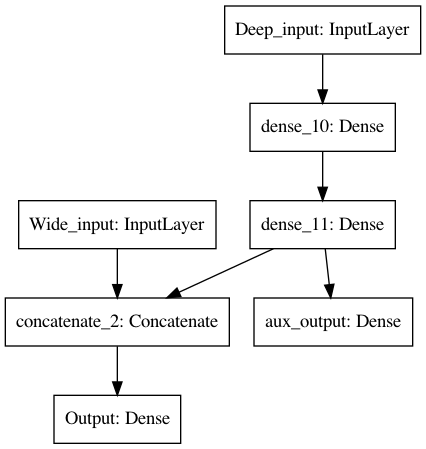

In [8]:
input_1 = Input(shape=[1], name="Wide_input")
input_2 = Input(shape=[1], name="Deep_input")

hidden_1 = Dense(30, activation="relu")(input_2)
hidden_2 = Dense(30, activation="relu")(hidden_1)

concat = concatenate([input_1, hidden_2])
output = Dense(1, name="Output")(concat)

aux_output = Dense(1, name="aux_output")(hidden_2)

model = Model(inputs=[input_1, input_2], outputs = [output,aux_output])

plot_model(model)

### Implement as a class

In [ ]:
class WideAndDeepModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        """Initializes the instance attributes"""
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
        
    def call(self, inputs):
        """Define the network architecture"""
        input_1 , input_2 = inputs
        hidden1 = self.hidden1(input_2)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_1, input_2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output    